In [1]:
import numpy as np
from scipy.fftpack import fft, fftfreq
from scipy.interpolate import interp1d
import math
import pandas as pd
import glob
from scipy.stats import zscore
import sys
import matplotlib.pyplot as plt

In [2]:
# convert degrees to mm
def degrees_to_mm(num_degrees, head_radius):
	dist_mm = 2*math.pi*head_radius*(num_degrees/360)
	return dist_mm


In [3]:
def make_fd_timeseries(data):
	# calculate differences between each TR and the previous
	data_diff = np.diff(data, axis = 0)

	# get one timeseries for framewise displacement, as in Power 2012
	# sum abs values of the parameters (differences from last TR), at each TR
	fd_ts = np.sum(abs(data_diff), axis = 1)

	return([data_diff, fd_ts])

In [6]:
realign_files = glob.glob('../../data/motion_retroicor/*.1D')

out_df_list = []
for index, file in enumerate(realign_files):
    print(file)
    raw = np.loadtxt(file)
    raw[:,0:3] = degrees_to_mm(raw[:,0:3], head_radius = 50)

    fd_params = pd.DataFrame(make_fd_timeseries(raw)[0])
    fd_params['file'] = file    
    fd_params['tr'] = range(fd_params.shape[0])
    out_df_list.append(fd_params)

../../data/motion_retroicor/motion_sub-19_run_6_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-06_run_5_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-05_run_3_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-02_run_4_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-04_run_8_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-17_run_5.1D
../../data/motion_retroicor/motion_sub-16_run_5.1D
../../data/motion_retroicor/motion_sub-20_run_1_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-09_run_5_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-04_run_2.1D
../../data/motion_retroicor/motion_sub-16_run_6_retroicor_filt.1D
../../data/motion_retroicor/motion_sub-05_run_2.1D
../../data/motion_retroicor/motion_sub-19_run_3.1D
../../data/motion_retroicor/motion_sub-14_run_8.1D
../../data/motion_retroicor/motion_sub-18_run_3.1D
../../data/motion_retroicor/motion_sub-15_run_8.1D
../../data/motion_retroicor/motion_sub-05_run_6_retroicor_filt.1

In [7]:
comb = pd.concat(out_df_list)

In [8]:
comb.describe()

,0,1,2,3,4,5,tr
count,100548.000000,100548.000000,100548.000000,100548.000000,100548.000000,100548.000000,100548.000000
mean,-0.000066,0.000618,-0.000202,-0.000283,-0.000200,-0.000588,227.131997
std,0.018372,0.039370,0.021718,0.059239,0.023333,0.084406,134.766921
min,-1.013600,-0.641059,-0.774315,-1.018000,-1.144000,-0.876000,0.000000
25%,-0.007243,-0.019460,-0.010036,-0.030100,-0.009700,-0.049100,112.000000
50%,-0.000087,0.000305,-0.000349,0.000300,-0.000300,-0.000300,224.000000
75%,0.007069,0.020420,0.009338,0.030500,0.009300,0.049200,336.000000
max,0.824232,1.009237,0.774315,0.920300,0.937000,0.994900,540.000000


In [9]:
comb.to_csv('retroicor_motion_diff.csv', index = False)

(350, 400)

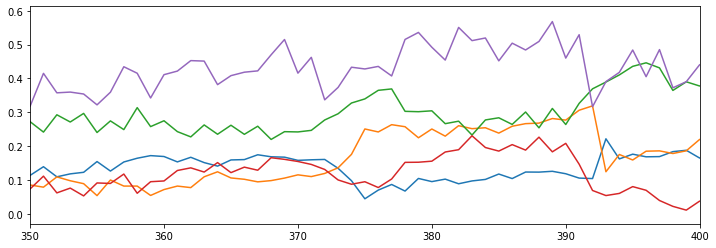

In [10]:
plt.rcParams['figure.figsize'] = [12, 4]

raw = np.loadtxt('../../data/motion_retroicor/motion_sub-03_run_1.1D')
raw[:,0:3] = degrees_to_mm(raw[:,0:3], head_radius = 50)
plt.plot(abs(np.diff(raw)))
plt.xlim(350,400)

(350, 400)

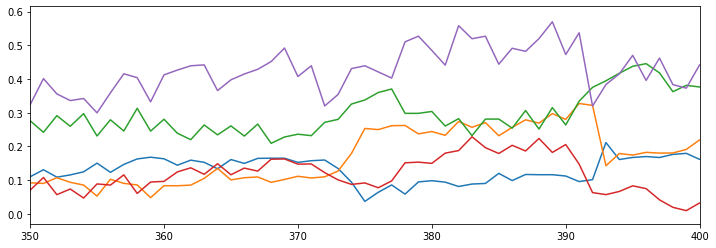

In [11]:
plt.rcParams['figure.figsize'] = [12, 4]
raw_r = np.loadtxt('../../data/motion_retroicor/motion_sub-03_run_1_retroicor_filt.1D')
raw_r[:,0:3] = degrees_to_mm(raw_r[:,0:3], head_radius = 50)
plt.plot(abs(np.diff(raw_r)))
plt.xlim(350,400)

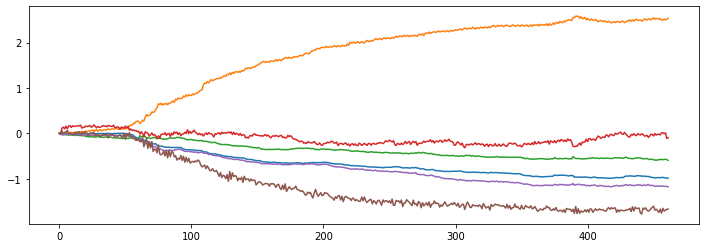

In [6]:
plt.rcParams['figure.figsize'] = [12, 4]
raw = np.loadtxt('../../data/motion_retroicor/motion_sub-09_run_5.1D')
raw[:,0:3] = degrees_to_mm(raw[:,0:3], head_radius = 50)
plt.plot(raw)

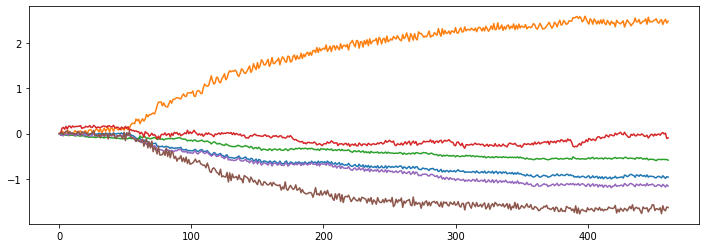

In [7]:
plt.rcParams['figure.figsize'] = [12, 4]
raw_r = np.loadtxt('../../data/motion_retroicor/motion_sub-09_run_5_retroicor_filt.1D')
raw_r[:,0:3] = degrees_to_mm(raw_r[:,0:3], head_radius = 50)
plt.plot(raw_r)